# Feature Engineering: Feature Creation

 process of creating new features or transforming your existing features to get the most out of your data
upto this here we just used what we are given but there may exists other features which can be extracted from data and can be useful to predict if it is ham or spam. Absence of these could mean we are potentially leaving some significant value on table.
eg: we can add length of text mayb spam is longer than ham.
or, what % of character are capitalize or puntuation etc.
given new features or any other already existing feature mayb we need some kind of transformation so that data will be more well-behaved.
1. Power transformation : includes squaring or square root of data etc
Why we need to transform data? if we have very skewed data(inaccurate) with very much outliers.
In this case rather than fitting on those skewed data it would be better to transform data so that skewed and outlier also comes back to bulk of data which would help to draaw much nicer correlation.

Another transformation can be standardzing. 
This is the section where you have to be creative as we must observe and find what new feature can be essential for predicting more precisely

### Read in text

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length

### it is extremely large concept. So we only talk about high level concepts just so we can get a basic working prototype

In [2]:
data['body_len']=data['body_text'].apply(lambda x:len(x)- x.count(' '))
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


### Create feature for % of text that is punctuation

In [3]:
import string

def count_punc(text):
    count= sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(' ')),3) *100

data['body_punc']= data['body_text'].apply(lambda x: count_punc(x))
data.head()

,label,body_text,body_len,body_punc
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Evaluate created features

### we assumed our hypothesis as spam data have large len and less % of punc

In [5]:
from matplotlib import pyplot 
import numpy as np
%matplotlib inline

In [9]:
bins =np.linspace(0,200,40)

pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha= 0.5, normed==True, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha= 0.5, normed==True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-9-d1f83060dbda>, line 3)

/home/sid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


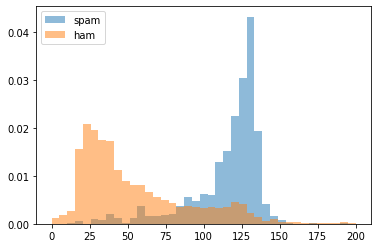

In [10]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

/home/sid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


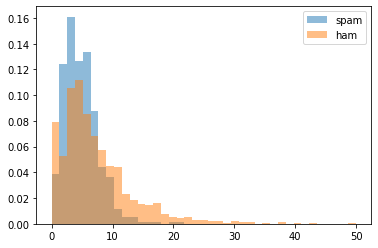

In [11]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label']=='spam']['body_punc'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['body_punc'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

### here our 1st assumption is true so it provide some value to model. but 2nd assumption doesnt seem to be correct so we are not sure if it provides value to model. in this case we will simply leave feature in model and see what kind of value model itself extract out of it.